In [1]:
import cv2

cap = cv2.VideoCapture('video.gif')
ret, frame1 = cap.read()
ret, frame2 = cap.read()
cv2.imwrite('motion1.jpg', frame1)
cv2.imwrite('motion2.jpg', frame2)
cap.release()


In [2]:
import cv2
import numpy as np

# Read two consecutive frames
frame1 = cv2.imread('motion1.jpg')
frame2 = cv2.imread('motion2.jpg')

In [3]:
# Convert to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)


In [4]:
# Detect feature points using Shi-Tomasi corner detector
features = cv2.goodFeaturesToTrack(gray1,
                                   maxCorners=200,
                                   qualityLevel=0.3,
                                   minDistance=7,
                                   blockSize=7)

In [5]:
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

In [6]:
# Calculate optical flow (track motion between frames)
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, features, None, **lk_params)

# Select good points
good_new = p1[st == 1]
good_old = features[st == 1]

# Create mask for visualization
mask = np.zeros_like(frame1)

In [7]:
# Draw motion vectors
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
    frame2 = cv2.circle(frame2, (int(a), int(b)), 5, (0, 0, 255), -1)

# Combine mask and frame
output = cv2.add(frame2, mask)


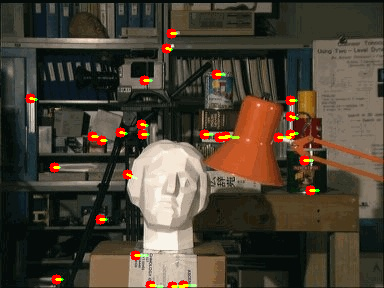

True

In [12]:
# Display in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(output)
cv2.imwrite('optical_flow_result.jpg', output)